In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/skin-cancer-malignant-vs-benign
/kaggle/input/skin-cancer-malignant-vs-benign/data
/kaggle/input/skin-cancer-malignant-vs-benign/data/test
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant
/kaggle/input/skin-cancer-malignant-vs-benign/data/train
/kaggle/input/skin-cancer-malignant-vs-benign/data/train/benign
/kaggle/input/skin-cancer-malignant-vs-benign/data/train/malignant
/kaggle/input/skin-cancer-malignant-vs-benign/test
/kaggle/input/skin-cancer-malignant-vs-benign/test/benign
/kaggle/input/skin-cancer-malignant-vs-benign/test/malignant
/kaggle/input/skin-cancer-malignant-vs-benign/train
/kaggle/input/skin-cancer-malignant-vs-benign/train/benign
/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant


## Skin Cancer: Malignant vs Benign
This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles.

Content
The data consists of two folders with each 1800 pictures (224x244) of the two types of moles.

## Acknowledgements
All the rights of the Data are bound to the ISIC-Archive rights (https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main). I do not take any responsibility for the right-infringement of any kernels. Thus, do not monetize this any of your models done on this data :).

Dataset link

https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial
 
AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')

2024-07-29 14:15:10.800091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 14:15:10.800224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 14:15:10.939985: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
data_train_dir ="/kaggle/input/skin-cancer-malignant-vs-benign/data/train"
data_test_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/data/test"

In [7]:
train_images = glob(f'{data_train_dir}/*/*.jpg')
len(train_images)

2637

In [8]:
test_images = glob(f'{data_test_dir}/*/*.jpg')
len(test_images)

660

In [9]:
def getImages(images):
    #replace backslash with forward slash to avoid unexpected errors
    images = [path.replace('\\', '/') for path in images]
    df = pd.DataFrame({'filepath': images})
    df['label'] = df['filepath'].str.split('/', expand=True)[6]
    return df

In [10]:
train_df = getImages(train_images)
train_df

,filepath,label
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
...,...,...
2632,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2633,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2634,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2635,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant


In [11]:
test_df = getImages(test_images)
test_df

,filepath,label
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
...,...,...
655,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
656,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
657,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
658,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant


In [12]:
def label_encoding(df):
    df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
    return df


In [13]:
train_df = label_encoding(train_df)
train_df

,filepath,label,label_bin
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
...,...,...,...
2632,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
2633,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
2634,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
2635,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1


In [14]:
test_df = label_encoding(test_df)
test_df

,filepath,label,label_bin
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign,0
...,...,...,...
655,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
656,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
657,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1
658,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant,1


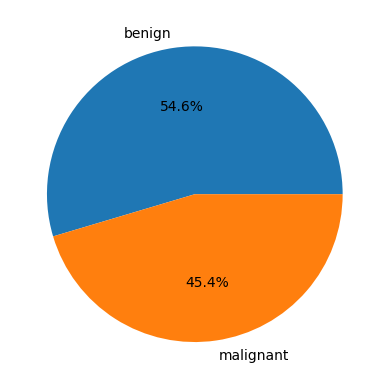

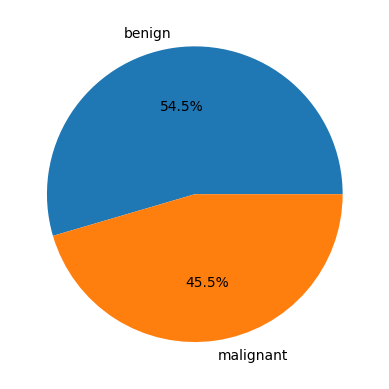

In [15]:
def pi_distribution(df):
    x = df['label'].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.show()


pi_distribution(train_df)
pi_distribution(test_df)


An approximately equal number of images have been given for each of the classes so, data imbalance is not a problem here.

In [16]:
def show_images(df):
    for cat in df['label'].unique():
        temp = df[df['label'] == cat]

        index_list = temp.index
        fig, ax = plt.subplots(1, 4, figsize=(15, 5))
        fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
        for i in range(4):
            index = np.random.randint(0, len(index_list))
            index = index_list[index]
            data = df.iloc[index]

            image_path = data[0]

            img = np.array(Image.open(image_path))
            ax[i].imshow(img)
    plt.tight_layout()
    plt.show()



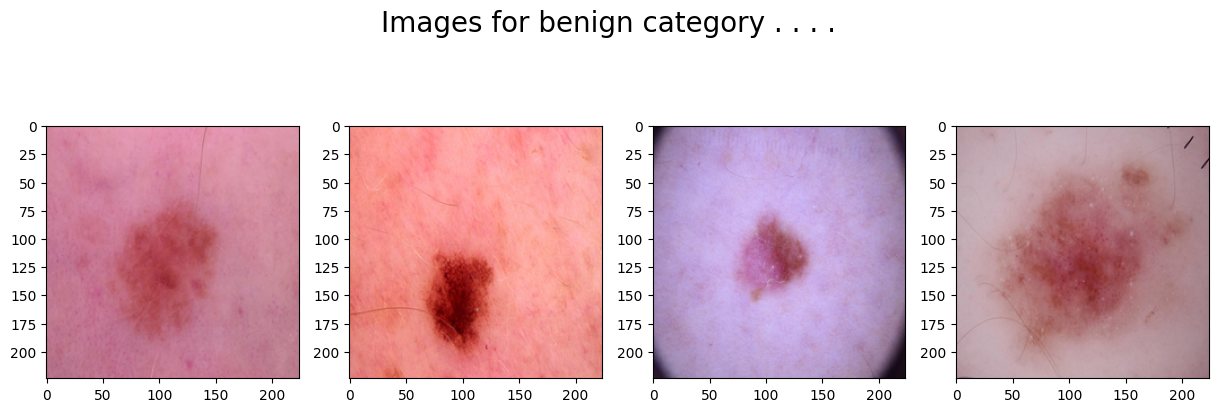

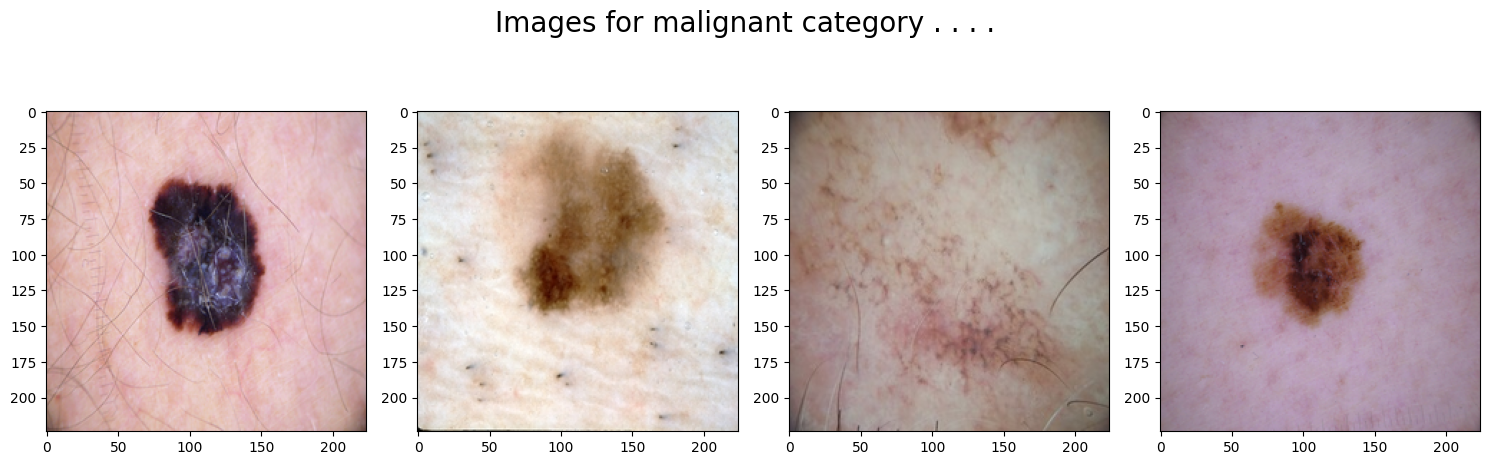

In [17]:
show_images(train_df)

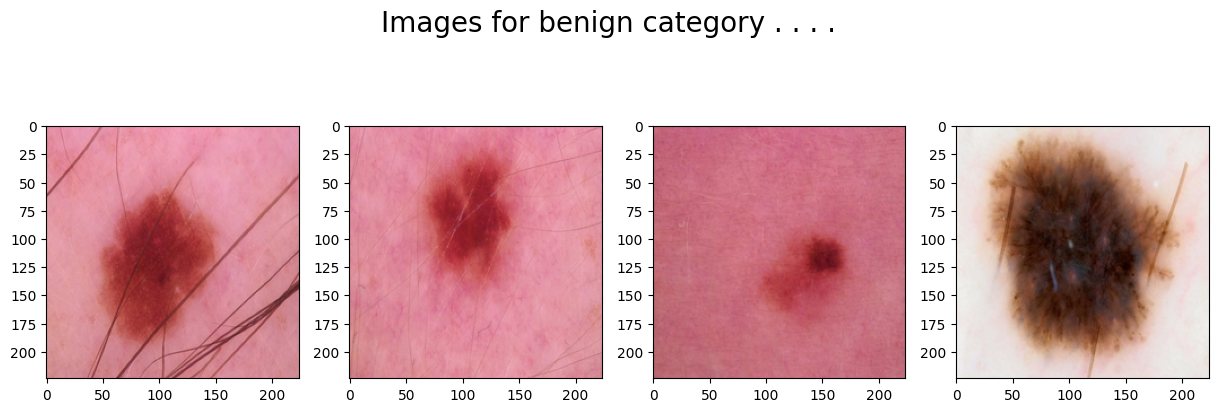

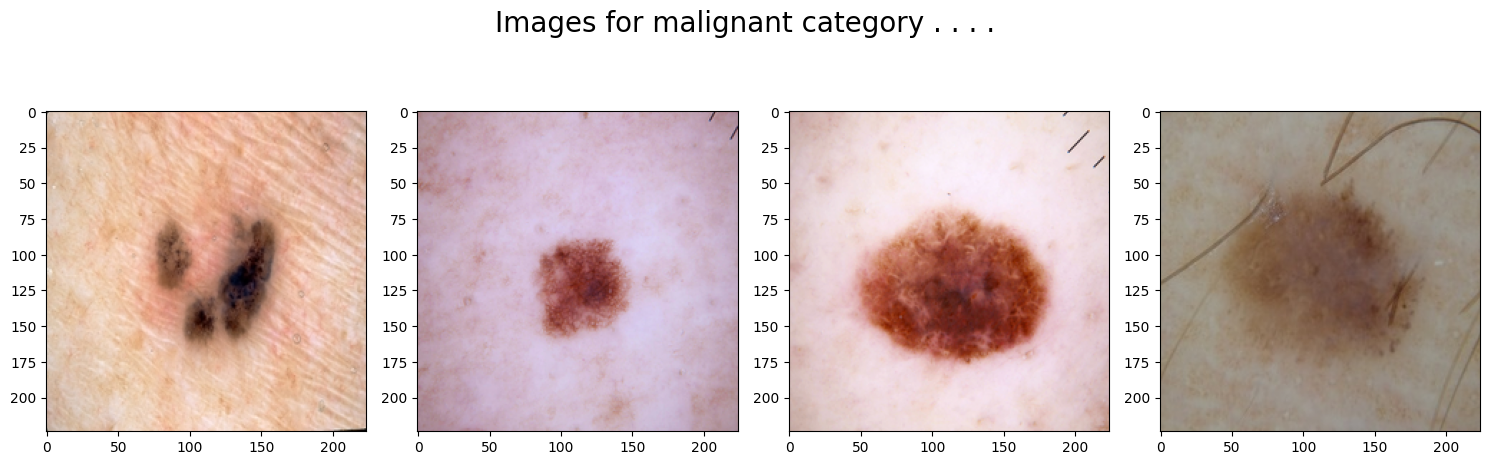

In [18]:
show_images(test_df)

In [19]:
def get_train_val(df):
    features = df['filepath']
    target = df['label_bin']

    X_train, X_val,\
        Y_train, Y_val = train_test_split(features, target,
                                          test_size=0.2,
                                          random_state=32)

    return X_train, X_val, Y_train, Y_val 

def get_test(df):
    features = df['filepath']
    target = df['label_bin']
    return features, target

In [20]:
X_train, X_val, Y_train, Y_val = get_train_val(train_df)
X_test, Y_test = get_test(test_df)

In [21]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape,X_test.shape, Y_test.shape 

((2109,), (2109,), (528,), (528,), (660,), (660,))

In [22]:
def decode_image(filepath, label=None):
    # Read and decode image
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=3)  # Specify channels to ensure correct decoding
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0
    
    
    return img, label

In [23]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)
 
val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

test_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_test, Y_test))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)


In [24]:

# Function to display a batch of images
def display_batch(dataset, num_images=5):
    # Retrieve a batch
    for images, labels in dataset.take(1):  # Take one batch
        # Display a few images from the batch
        plt.figure(figsize=(10, 10))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i])
            plt.title(f'Label: {labels[i].numpy()}')
            plt.axis('off')
        plt.show()
        break  # Exit the loop after displaying one batch


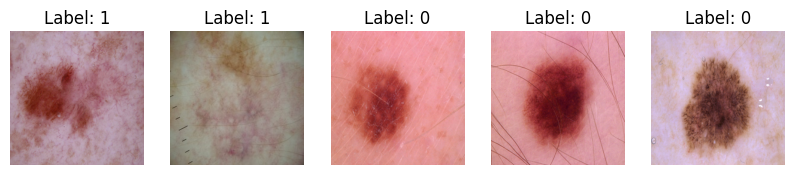

In [25]:

# Display a batch of images
display_batch(train_ds)

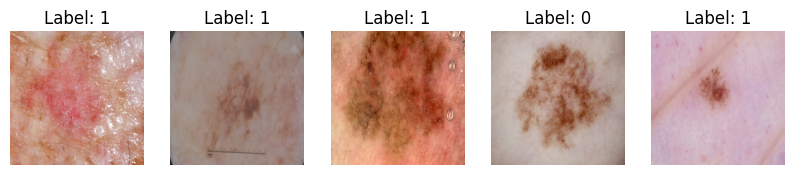

In [26]:
# Display a batch of images
display_batch(val_ds)

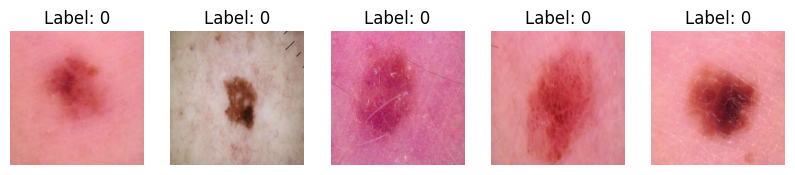

In [27]:
# Display a batch of images
display_batch(test_ds)

# Model Architechture

We will implement a model using the  Functional API of Keras which will contain the following parts:

- The base model is the EfficientNet model in this case.
- The Flatten layer flattens the output of the base model’s output.
- Then we will have two fully connected layers followed by the output of the flattened layer.
- We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
- The final layer is the output layer which outputs soft probabilities for the three classes. 

In [79]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

# Set the random seed for reproducibility
tf.random.set_seed(42)

# pre_trained_model = EfficientNetB7(
#     input_shape=(224, 224, 3),
#     weights='imagenet',
#     include_top=False
# )
 
# for layer in pre_trained_model.layers:
#     layer.trainable = False

In [80]:
# from tensorflow.keras import Model
 
# inputs = layers.Input(shape=(224, 224, 3))
# # x = pre_trained_model(inputs, training=False)
# # x = layers.GlobalAveragePooling2D()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.3)(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.3)(x)
# x = layers.BatchNormalization()(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
 
# model = Model(inputs, outputs)

In [81]:
from tensorflow.keras import layers, Model, regularizers

# Define the input layer
inputs = layers.Input(shape=(224, 224, 3))

# Add CNN layers with L2 regularization
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten the output from the CNN layers
x = layers.Flatten()(x)

# Add fully connected (dense) layers with increased dropout
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)



In [82]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC','accuracy']
)

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Training will stop if the validation loss does not improve for 5 consecutive epochs.
    restore_best_weights=True  # Restore the best weights at the end of training
)

# This way, the training process will halt when it detects that the model performance 
# on the validation set is not improving, potentially saving training time and 
# reducing overfitting.

In [83]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,368,641 (51.00 MB)

 Trainable params: 13,367,105 (50.99 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [84]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=200,
                    # callbacks=[early_stopping],
                    verbose=1)

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 207ms/step - AUC: 0.6033 - accuracy: 0.5724 - loss: 11.8530 - val_AUC: 0.5182 - val_accuracy: 0.5701 - val_loss: 11.0179
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.6831 - accuracy: 0.6286 - loss: 7.3134 - val_AUC: 0.5000 - val_accuracy: 0.4299 - val_loss: 11.1143
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.6993 - accuracy: 0.6681 - loss: 5.4060 - val_AUC: 0.5088 - val_accuracy: 0.5701 - val_loss: 9.3170
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.8114 - accuracy: 0.7227 - loss: 4.1367 - val_AUC: 0.8524 - val_accuracy: 0.6212 - val_loss: 3.5979
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.8070 - accuracy: 0.7381 - loss: 3.2457 - val_AUC: 0.5000 - val_accuracy: 0.4299 - val_loss: 5.4524
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.8035 - accuracy: 0.7435 - loss: 2.6284 - val_AUC: 0.4791 - val_accuracy: 0.4299 - val_loss: 4.2698
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━

In [85]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
0,0.675641,0.632053,10.494473,0.518163,0.570076,11.017915
1,0.639975,0.601707,6.822990,0.500000,0.429924,11.114253
2,0.748230,0.690849,5.059939,0.508811,0.570076,9.316968
3,0.809142,0.725462,3.875045,0.852423,0.621212,3.597947
4,0.817263,0.743480,3.049655,0.500000,0.429924,5.452350


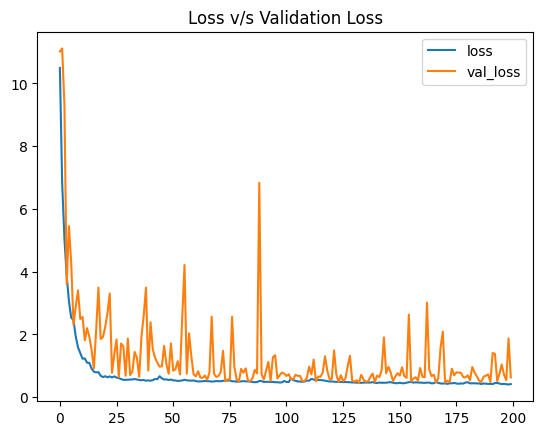

In [86]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

Training loss has not decreased over time as much as the validation loss.

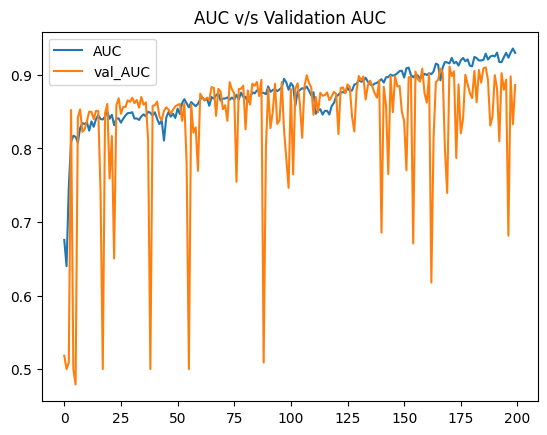

In [87]:
hist_df['AUC'].plot()
hist_df['val_AUC'].plot()
plt.title('AUC v/s Validation AUC')
plt.legend()
plt.show()

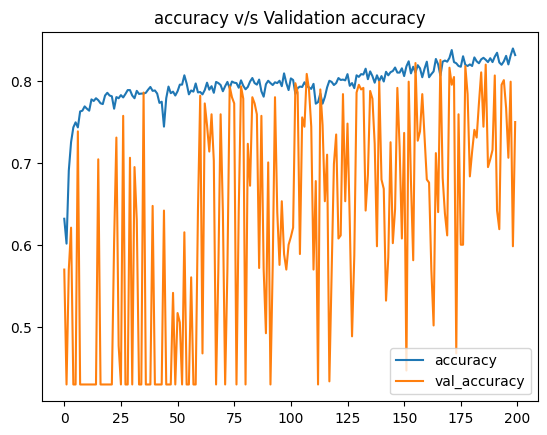

In [88]:
hist_df['accuracy'].plot()
hist_df['val_accuracy'].plot()
plt.title('accuracy v/s Validation accuracy')
plt.legend()
plt.show()

In [89]:
# save the model
model.save('CNN_SKINCANCER.h5')

In [90]:
# Evaluate the model on the test dataset
test_loss, test_auc, test_accuracy = model.evaluate(test_ds, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')
print(f'Test Accuracy: {test_accuracy}')

20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - AUC: 0.4020 - accuracy: 0.8881 - loss: 0.3850

2024-07-29 11:54:47.497316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.90306, expected 3.1331
2024-07-29 11:54:47.497389: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.61733, expected 3.84737
2024-07-29 11:54:47.497399: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.23399, expected 4.46402
2024-07-29 11:54:47.497407: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.26095, expected 3.49098
2024-07-29 11:54:47.497415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.5243, expected 3.75433
2024-07-29 11:54:47.497422: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.66323, expected 4.89327
2024-07-29 11:54:47.497430: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.71731, expected 3.94734
2024-07-29 11:54:47.497438: E external/local_xla/xla/serv

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - AUC: 0.4470 - accuracy: 0.8759 - loss: 0.4029
Test Loss: 0.5813401341438293
Test AUC: 0.8971250057220459
Test Accuracy: 0.7545454502105713


The above model is likely overfitting

In [91]:
!pip install keras-tuner


In [92]:
import keras_tuner as kt
from tensorflow.keras import layers, Model, regularizers

def build_model(hp):
    inputs = layers.Input(shape=(224, 224, 3))
    x = layers.Conv2D(hp.Int('conv_1_units', min_value=32, max_value=256, step=32), 
                      (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    for i in range(hp.Int('num_conv_layers', 1, 4)):
        x = layers.Conv2D(hp.Int(f'conv_{i+2}_units', min_value=32, max_value=256, step=32), 
                          (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)

    for i in range(hp.Int('num_dense_layers', 1, 3)):
        x = layers.Dense(hp.Int(f'dense_{i+1}_units', min_value=128, max_value=512, step=64), 
                         activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp.Float(f'dropout_{i+1}', min_value=0.3, max_value=0.7, step=0.1))(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    return model


In [ ]:
# Hyperparameter Tuning

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

tuner.search(train_ds, validation_data=val_ds, epochs=50)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 8 Complete [00h 05m 58s]
val_accuracy: 0.8267045617103577

Best val_accuracy So Far: 0.8267045617103577
Total elapsed time: 00h 56m 24s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
96                |96                |conv_1_units
4                 |3                 |num_conv_layers
64                |32                |conv_2_units
2                 |1                 |num_dense_layers
192               |192               |dense_1_units
0.6               |0.4               |dropout_1
160               |224               |conv_3_units
32                |256               |conv_4_units
224               |224               |conv_5_units
256               |448               |dense_2_units
0.4               |0.4               |dropout_2
384               |192               |dense_3_units
0.4               |0.6               |dropout_3

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 237ms/step - AUC: 0.6660 - accuracy: 0.6288 - loss: 5.4763 - val_AUC: 0

# Better Model Architecture



In [28]:
from tensorflow.keras import layers, Model, regularizers

def build_model():
    inputs = layers.Input(shape=(224, 224, 3))
    x = layers.Conv2D(192, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(224, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(224, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)

    x = layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Dense(448, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.6)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    return model


In [30]:
model = build_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 96)   │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 96)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 32)   │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 224)    │        64,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 28, 28, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 256)    │       516,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 224)    │       516,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 224)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 192)            │     2,107,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 448)            │        86,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 448)            │         1,792 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 192)            │        86,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,411,553 (13.01 MB)

 Trainable params: 3,409,889 (13.01 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [38]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50,
                    verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - AUC: 0.8836 - accuracy: 0.7860 - loss: 0.6412 - val_AUC: 0.8622 - val_accuracy: 0.6667 - val_loss: 14.8821
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - AUC: 0.8830 - accuracy: 0.8023 - loss: 0.6427 - val_AUC: 0.8726 - val_accuracy: 0.7898 - val_loss: 6.7683
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - AUC: 0.8927 - accuracy: 0.8064 - loss: 0.6163 - val_AUC: 0.8883 - val_accuracy: 0.7955 - val_loss: 9.9398
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - AUC: 0.8605 - accuracy: 0.7619 - loss: 0.6829 - val_AUC: 0.8041 - val_accuracy: 0.4413 - val_loss: 23.0284
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - AUC: 0.8303 - accuracy: 0.7786 - loss: 0.6788 - val_AUC: 0.8610 - val_accuracy: 0.6250 - val_loss: 9.2871
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - AUC: 0.8676 - accuracy: 0.7802 - loss: 0.5912 - val_AUC: 0.8665 - val_accuracy: 0.6477 - val_loss: 33.6836
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47

In [39]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
0,0.885784,0.798483,0.639323,0.862243,0.666667,14.882060
1,0.881506,0.802750,0.647229,0.872642,0.789773,6.768288
2,0.889454,0.809862,0.620079,0.888316,0.795455,9.939762
3,0.827503,0.740161,0.750527,0.804148,0.441288,23.028410
4,0.840468,0.784258,0.655476,0.861021,0.625000,9.287093


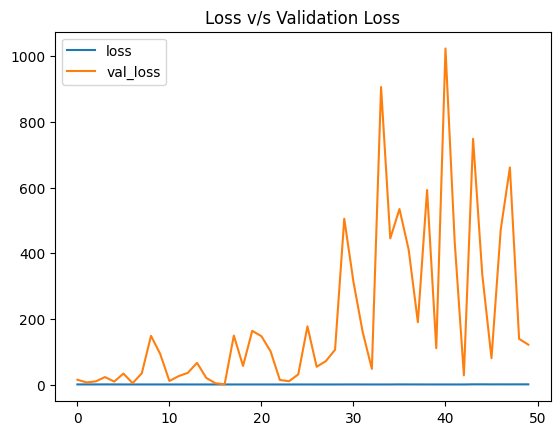

In [40]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

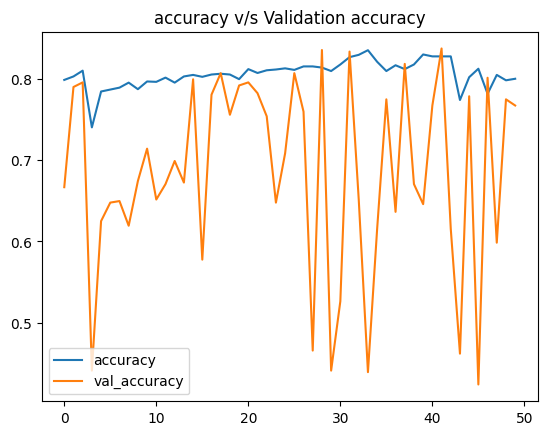

In [41]:
hist_df['accuracy'].plot()
hist_df['val_accuracy'].plot()
plt.title('accuracy v/s Validation accuracy')
plt.legend()
plt.show()

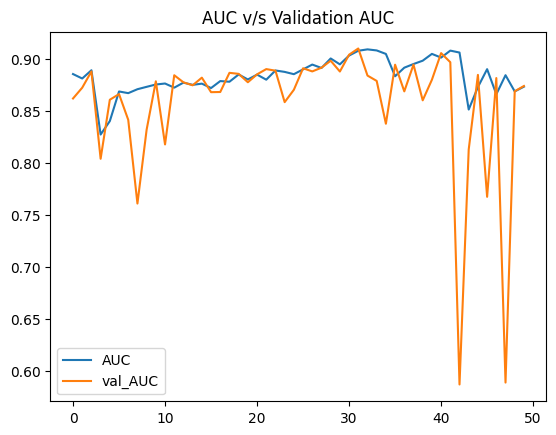

In [42]:
hist_df['AUC'].plot()
hist_df['val_AUC'].plot()
plt.title('AUC v/s Validation AUC')
plt.legend()
plt.show()

In [43]:
# Evaluate the model on the test dataset
test_loss, test_auc, test_accuracy = model.evaluate(test_ds, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')
print(f'Test Accuracy: {test_accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.4389 - accuracy: 0.7736 - loss: 32.9021
Test Loss: 354.4067077636719
Test AUC: 0.7560606002807617
Test Accuracy: 0.8448055386543274


In [44]:
# save the model
model.save('CNN_SKINCANCER_Hyperparameter_Tuned.h5')